In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
drugs = pd.read_csv("Drugs Data.csv")
drugs.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC


In [3]:
feature_cols = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
x = drugs[feature_cols].values
y = drugs.Drug

In [4]:
from sklearn import preprocessing

cod_Sex = preprocessing.LabelEncoder()
cod_Sex.fit(['F', 'M'])
x[:, 1] = cod_Sex.transform(x[:, 1])

cod_Bp = preprocessing.LabelEncoder()
cod_Bp.fit(['HIGH', 'NORMAL', 'LOW'])
x[:, 2] = cod_Bp.transform(x[:, 2])

cod_Cholesterol = preprocessing.LabelEncoder()
cod_Cholesterol.fit(['NORMAL', 'HIGH'])
x[:, 3] = cod_Cholesterol.transform(x[:, 3])

In [5]:
# Se necesita cambiar la columna y para al ultimo poder graficar la curva (ROC)
# si no se graficaran los valores no fuera necesario
cod_Drug = preprocessing.LabelEncoder()
y = cod_Drug.fit_transform(y)

In [6]:
# Creacion de grupos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

# 01 Regresion logistica Solver = sag

In [8]:
model = LogisticRegression(solver = "sag")
model.fit(x_train, y_train)

LogisticRegression(solver='sag')

In [9]:
print('--------------------------------Resultados Del Solver = sag----------------------------------\n')
y_pred = model.predict(x_test)
print("Interceptó (Beta 0)", model.intercept_)
print("Pesos (Betas)", model.coef_)
print('--------------------------------------------------------------------------------------------')

score = model.score(x_test, y_test)
print("Presicion score:", score)
print('--------------------------------------------------------------------------------------------')
print(classification_report(y_test, y_pred))

--------------------------------Resultados Del Solver = sag----------------------------------

Interceptó (Beta 0) [ 0.25504254 -0.08279255  0.08605594  0.28912248 -0.54742841]
Pesos (Betas) [[-0.02651454  0.16222845 -0.64452514  0.05953441  0.09987811]
 [ 0.07156632 -0.0403622  -0.62196858 -0.00765983 -0.27723513]
 [-0.00373959  0.01380221  0.14549037 -0.27353655 -0.01632736]
 [ 0.00990244 -0.05105712  1.28956364  0.42560035 -0.11627711]
 [-0.05121464 -0.08461134 -0.16856029 -0.20393837  0.3099615 ]]
--------------------------------------------------------------------------------------------
Presicion score: 0.7
--------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      1.00      0.50         2
           2       0.00      0.00      0.00         4
           3       0.79      0.85      0.81        13
           4   

# 02 Regresion logistica Solver = newton-cg

In [11]:
modeln = LogisticRegression(solver = "newton-cg")
modeln.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [12]:
print('--------------------------------Resultados Del Solver = newton-cg---------------------------\n')
y_pred = modeln.predict(x_test)
print("Interceptó (Beta 0)", modeln.intercept_)
print("Pesos (Betas)", modeln.coef_)
print('--------------------------------------------------------------------------------------------')

score = modeln.score(x_test, y_test)
print("Presicion score:", score)
print('--------------------------------------------------------------------------------------------')
metnewton = classification_report(y_test, y_pred)
print(metnewton)

--------------------------------Resultados Del Solver = newton-cg---------------------------

Interceptó (Beta 0) [ 14.93134859   0.86047434  10.25804415   6.24272872 -32.29259581]
Pesos (Betas) [[-8.96675799e-02  3.48970693e-02 -2.31832044e+00 -4.80361727e-01
  -6.87966508e-01]
 [ 1.25004538e-01 -6.61612285e-02 -1.72623292e+00  8.89774564e-02
  -4.38170039e-01]
 [-2.62546602e-02 -8.18121384e-02  5.55151950e-01 -1.49448925e+00
  -6.08735563e-01]
 [-6.11850645e-03 -3.06935908e-01  3.07004701e+00  1.74885459e+00
  -5.83887665e-01]
 [-2.96379192e-03  4.20012206e-01  4.19354402e-01  1.37018933e-01
   2.31875977e+00]]
--------------------------------------------------------------------------------------------
Presicion score: 0.95
--------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.50      1.00      0.67         2
        

# 03 Regresion logistica Solver = liblinear

In [14]:
model = LogisticRegression(solver = "liblinear")
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [15]:
print('--------------------------------Resultados Del Solver = liblinear---------------------------\n')
y_pred = model.predict(x_test)
print("Interceptó (Beta 0)", model.intercept_)
print("Pesos (Betas)", model.coef_)
print('--------------------------------------------------------------------------------------------')

score = model.score(x_test, y_test)
print("Presicion score:", score)
print('--------------------------------------------------------------------------------------------')
print(classification_report(y_test, y_pred))

--------------------------------Resultados Del Solver = liblinear---------------------------

Interceptó (Beta 0) [ 2.40746561 -0.69169247  0.59552877  0.49274606 -4.53305879]
Pesos (Betas) [[-2.92140699e-02  4.44045986e-01 -2.27567481e+00 -3.95479579e-01
  -1.64992579e-01]
 [ 1.06714256e-01 -4.68494848e-01 -2.51665437e+00 -2.91727058e-01
  -4.28052683e-01]
 [-2.39661114e-03  5.01768296e-03 -5.76612086e-02 -1.77734484e+00
  -1.83201944e-01]
 [ 9.67804579e-03 -5.71764844e-01  3.03029788e+00  2.17470282e+00
  -4.65843053e-01]
 [-4.05475257e-02  5.57354681e-02 -2.72511077e-01 -4.43385664e-01
   4.48981391e-01]]
--------------------------------------------------------------------------------------------
Presicion score: 0.825
--------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.40      1.00      0.57         2
           2

# 04 Regresion logistica Solver = saga

In [17]:
model = LogisticRegression(solver = "saga")
model.fit(x_train, y_train)

LogisticRegression(solver='saga')

In [18]:
print('--------------------------------Resultados Del Solver = saga--------------------------------\n')
y_pred = model.predict(x_test)
print("Interceptó (Beta 0)", model.intercept_)
print("Pesos (Betas)", model.coef_)
print('--------------------------------------------------------------------------------------------')

score = model.score(x_test, y_test)
print("Presicion score:", score)
print('--------------------------------------------------------------------------------------------')
print(classification_report(y_test, y_pred))

--------------------------------Resultados Del Solver = saga--------------------------------

Interceptó (Beta 0) [ 0.12852764 -0.0537988   0.04028735  0.17662633 -0.29164253]
Pesos (Betas) [[-0.02417534  0.09275552 -0.38833977  0.03909453  0.087241  ]
 [ 0.06553094 -0.02037459 -0.38704392 -0.0029617  -0.26889735]
 [-0.00367574  0.00506597  0.06811439 -0.14759234 -0.01979035]
 [ 0.01342962 -0.02751337  0.85764631  0.23035256 -0.08041492]
 [-0.05110948 -0.04993353 -0.15037701 -0.11889305  0.28186162]]
--------------------------------------------------------------------------------------------
Presicion score: 0.725
--------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      1.00      0.50         2
           2       0.00      0.00      0.00         4
           3       0.85      0.85      0.85        13
           4  

# 05 Regresion logistica Solver = lbfgs

In [20]:
model = LogisticRegression(solver = "lbfgs")
model.fit(x_train, y_train)

LogisticRegression()

In [21]:
print('--------------------------------Resultados Del Solver = lbfgs-------------------------------\n')
y_pred = model.predict(x_test)
print("Interceptó (Beta 0)", model.intercept_)
print("Pesos (Betas)", model.coef_)
print('--------------------------------------------------------------------------------------------')

score = model.score(x_test, y_test)
print("Presicion score:", score)
print('--------------------------------------------------------------------------------------------')
print(classification_report(y_test, y_pred))

--------------------------------Resultados Del Solver = lbfgs-------------------------------

Interceptó (Beta 0) [ 2.30830142 -0.56895847  1.04697956  1.46379579 -4.2501183 ]
Pesos (Betas) [[-0.03527225  0.69182017 -2.91505145 -0.30497043  0.06613778]
 [ 0.11094007 -0.45804562 -2.75149396 -0.30740254 -0.27721474]
 [-0.02067732  0.13601281  1.17549281 -1.75859854  0.00710061]
 [-0.01231335 -0.55191367  4.03057392  2.83707875 -0.37111436]
 [-0.04267716  0.18212631  0.46047868 -0.46610724  0.5750907 ]]
--------------------------------------------------------------------------------------------
Presicion score: 0.85
--------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.50      1.00      0.67         2
           2       1.00      0.25      0.40         4
           3       0.81      1.00      0.90        13
           4   

# Metricas del algoritmo predictivo escogido

In [23]:
print(metnewton)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.50      1.00      0.67         2
           2       1.00      0.50      0.67         4
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        17

    accuracy                           0.95        40
   macro avg       0.90      0.90      0.87        40
weighted avg       0.97      0.95      0.95        40



In [24]:
# Obtener las probabilidades de predicción
y_pred_probs = modeln.predict_proba(x_test)#[:, 1]
# Redondear los valores a 0 o 1, necesario para graficar 
y_pred_probs = np.round(y_pred_probs, 0)

In [25]:
y_pred_probs[0:7]

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [26]:
y_test[0:7]

array([3, 4, 3, 2, 4, 3, 3])

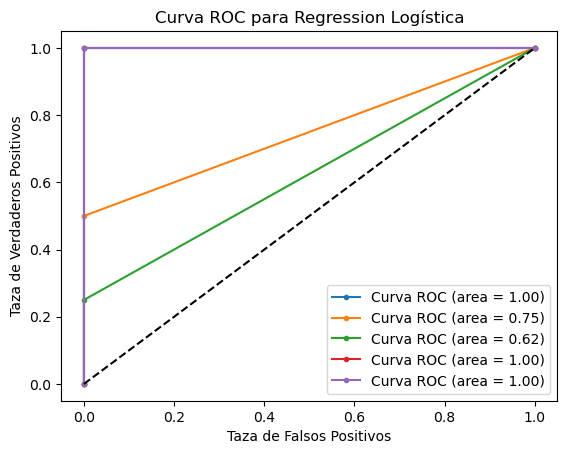

In [27]:
# Graficacion de la curva ROC y calculo del area bajo ella
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_pred_probs.shape[1]
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_probs[:, i]) 
    plt.plot(fpr, tpr, marker = ".", label = "Curva ROC (area = %0.2f)" %auc)

plt.plot([0,1],[0,1], 'k--')
plt.xlabel("Taza de Falsos Positivos")
plt.ylabel("Taza de Verdaderos Positivos")
plt.legend(loc =  "lower right")
plt.title("Curva ROC para Regression Logística")
plt.show()